In [18]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/train.csv')
data2 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/test.csv')

train_df = data1.copy()
test_df = data2.copy()

print("First 3 rows of train_df: \n", train_df.head(3))
print("First 3 rows of test_df: \n", test_df.head(3))

First 3 rows of train_df: 
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
First 3 rows of test_df: 
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  


In [20]:
#function to make the columns snake_case
import re

def to_snake_case(df):
    def convert(name):
        #lower case
        name = name.lower()
        # Replace spaces and hyphens with underscores
        name = re.sub(r'[\s\-]+', '_', name)
        # Add underscore before capital letters (except at the beginning)
        name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
        # Convert to lowercase
        return name.lower()

    df.columns = [convert(col) for col in df.columns]
    return df

In [21]:
to_snake_case(train_df)
to_snake_case(test_df)

,id,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['soil_type'] = le.fit_transform(train_df['soil_type'])
train_df['crop_type'] = le.fit_transform(train_df['crop_type'])
train_df['fertilizer_name'] = le.fit_transform(train_df['fertilizer_name'])

In [23]:
id_placeholder = train_df['id']
train_df = train_df.drop(columns='id') #no statistical value

## KPIs development

In [ ]:
test_df = test_df.rename(columns= {'temparature' : 'temperature'})

In [25]:
train_df['nutrient_index'] = train_df['nitrogen'] + train_df['phosphorous'] + train_df['potassium']
train_df['nutrient_moisture_ration'] = train_df['nutrient_index'] / (train_df['moisture'] + 1e-6)
train_df['climate_stress'] = (train_df['temperature'] - train_df['humidity']) / (train_df['temperature'] +1e-6)
train_df['climate_gap'] = abs(train_df['temperature'] - train_df['humidity'])
train_df['water_retention'] = train_df['moisture'] * train_df['humidity']
train_df['water_stress_index'] = train_df['temperature'] / (train_df['humidity'] + train_df['moisture'] + 1e-6)
train_df['temp_humidity'] = train_df['temperature'] * train_df['humidity']
train_df['temp_moisture'] = train_df['temperature'] * train_df['moisture']
train_df['np_ratio'] = train_df['nitrogen'] / (train_df['phosphorous'] + 1e-6)
train_df['nk_ratio'] = train_df['nitrogen'] / (train_df['potassium'] + 1e-6)
train_df['pk_ratio'] = train_df['phosphorous'] / (train_df['potassium'] + 1e-6)
train_df['total_npk'] = train_df['nitrogen'] + train_df['phosphorous'] + train_df['potassium']
train_df['n_proportion'] = train_df['nitrogen'] / (train_df['total_npk'] + 1e-6)
train_df['p_proportion'] = train_df['potassium'] / (train_df['total_npk'] + 1e-6)
train_df['k_proportion'] = train_df['potassium'] / (train_df['total_npk'] + 1e-6)

## Distribution after KPIs introduction

In [26]:
num = train_df.select_dtypes(include='number')
cat = train_df.select_dtypes(exclude='number')

In [27]:
train_df.columns.nunique()

24

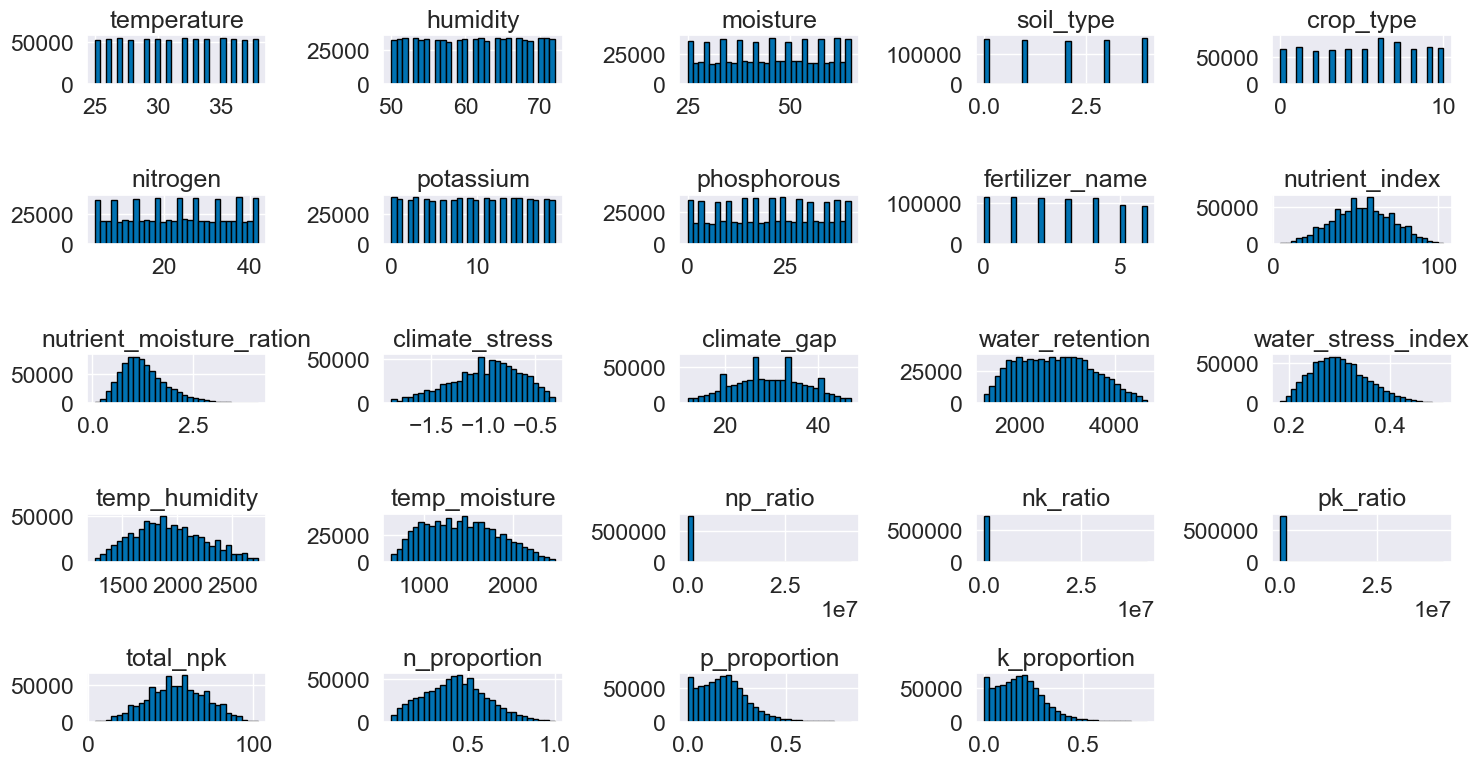

In [37]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

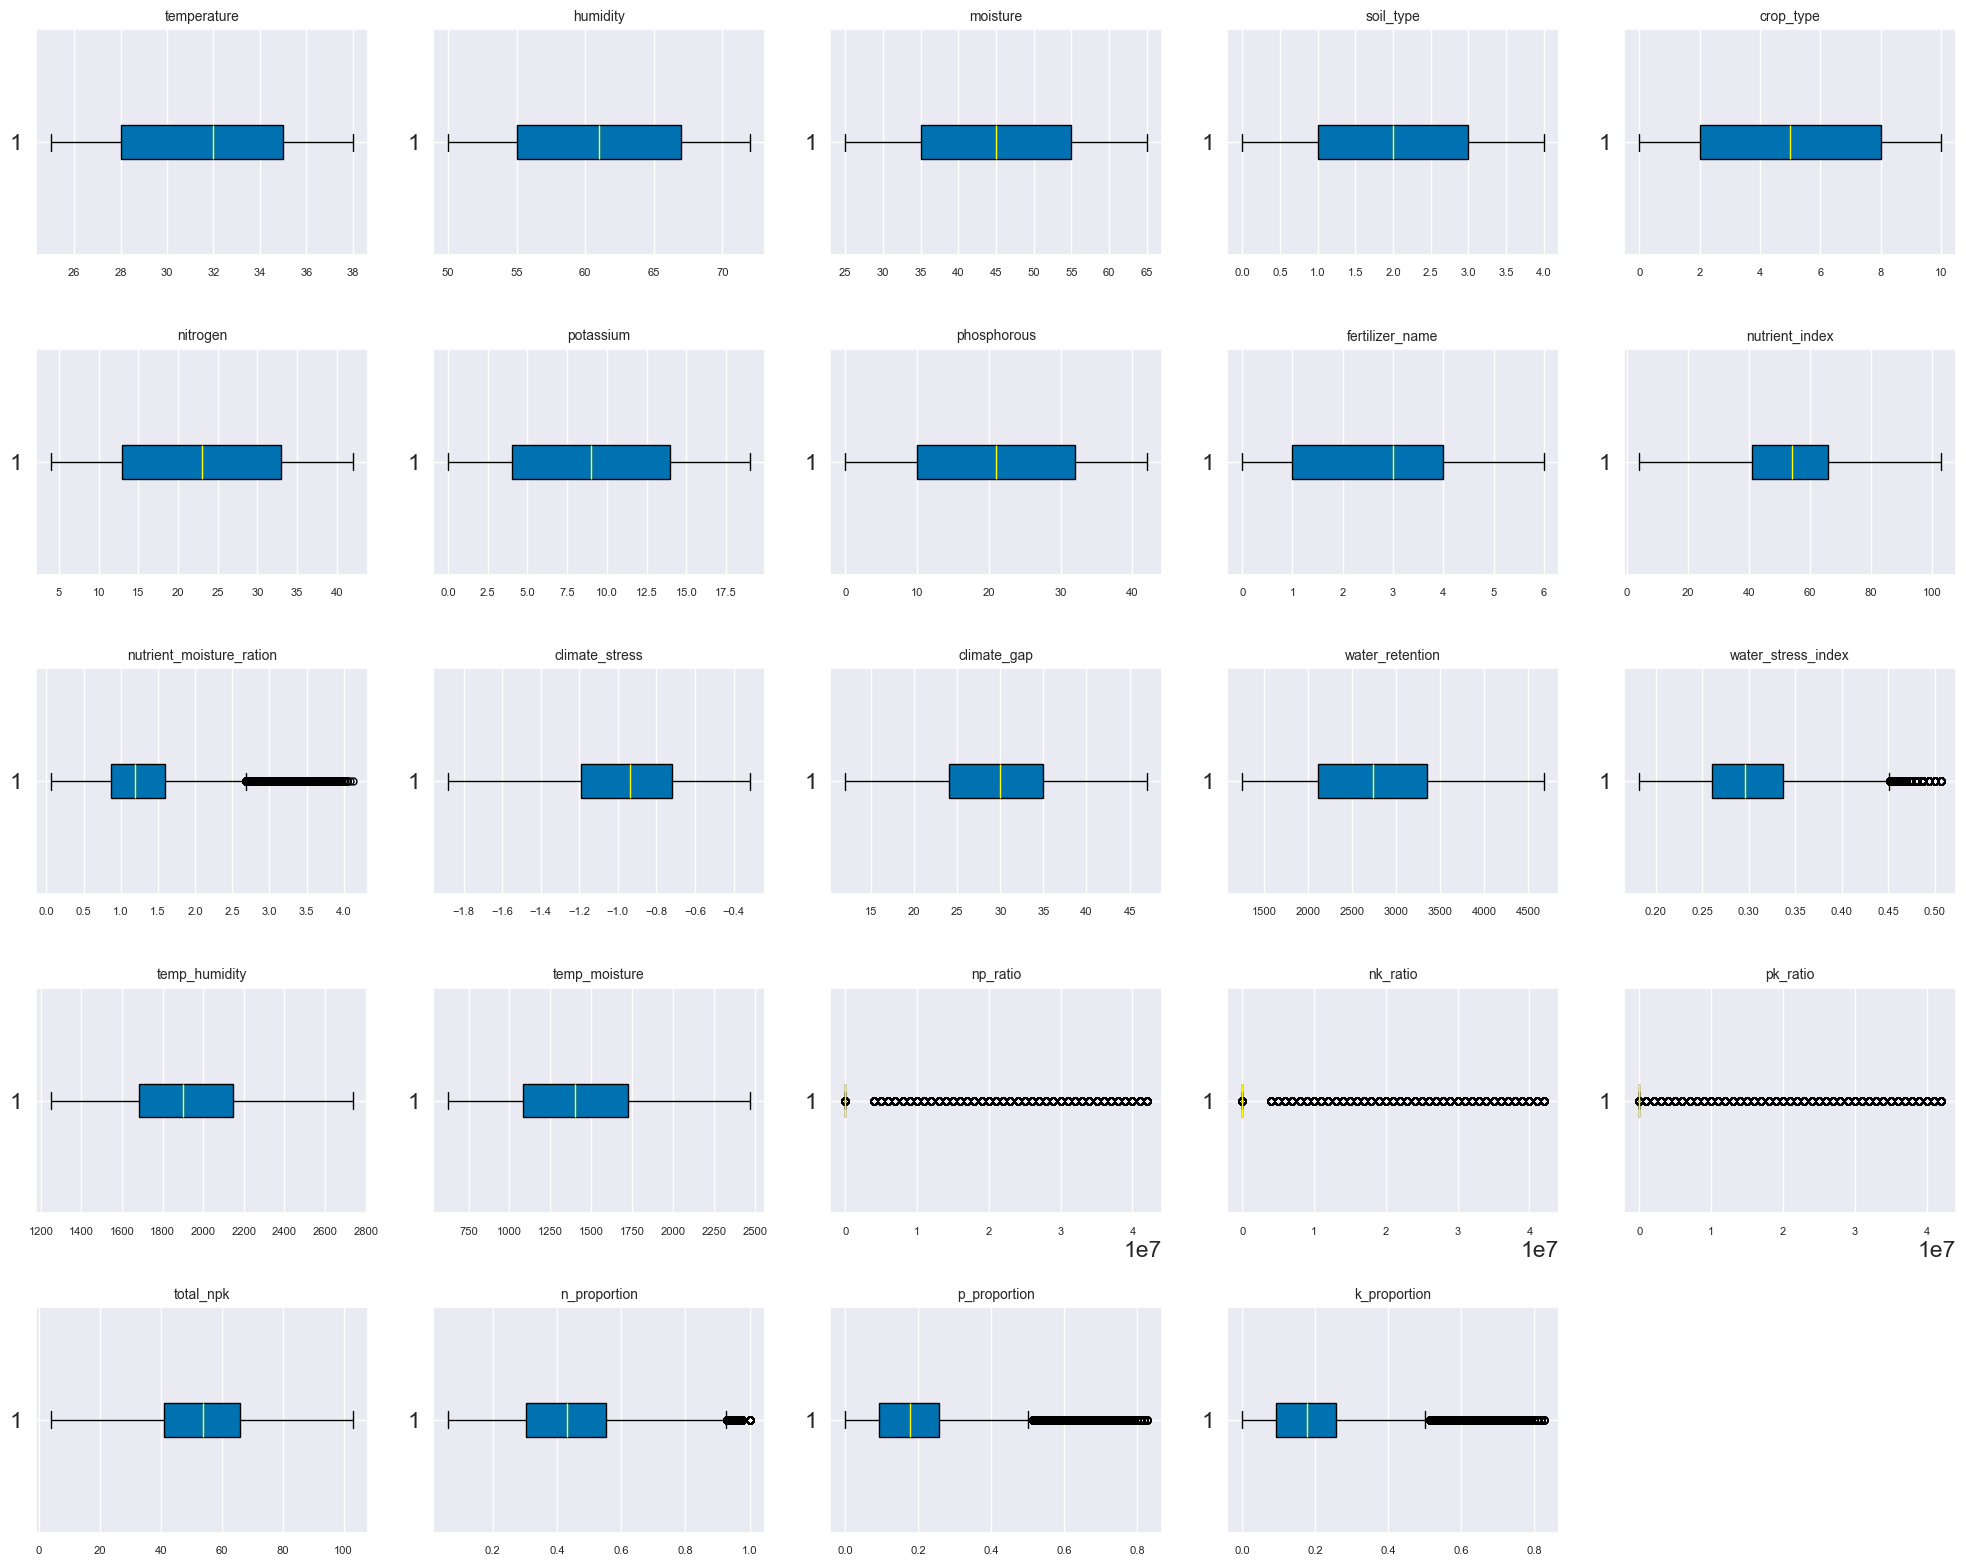

In [38]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df['soil_type'] = le.fit_transform(train_df['soil_type'])
train_df['crop_type'] = le.fit_transform(train_df['crop_type'])
train_df['fertilizer_name'] = le.fit_transform(train_df['fertilizer_name'])

## Correlation Matrix

In [31]:
target_placeholder = train_df.pop('fertilizer_name')
train_df['fertilizer_name'] = target_placeholder

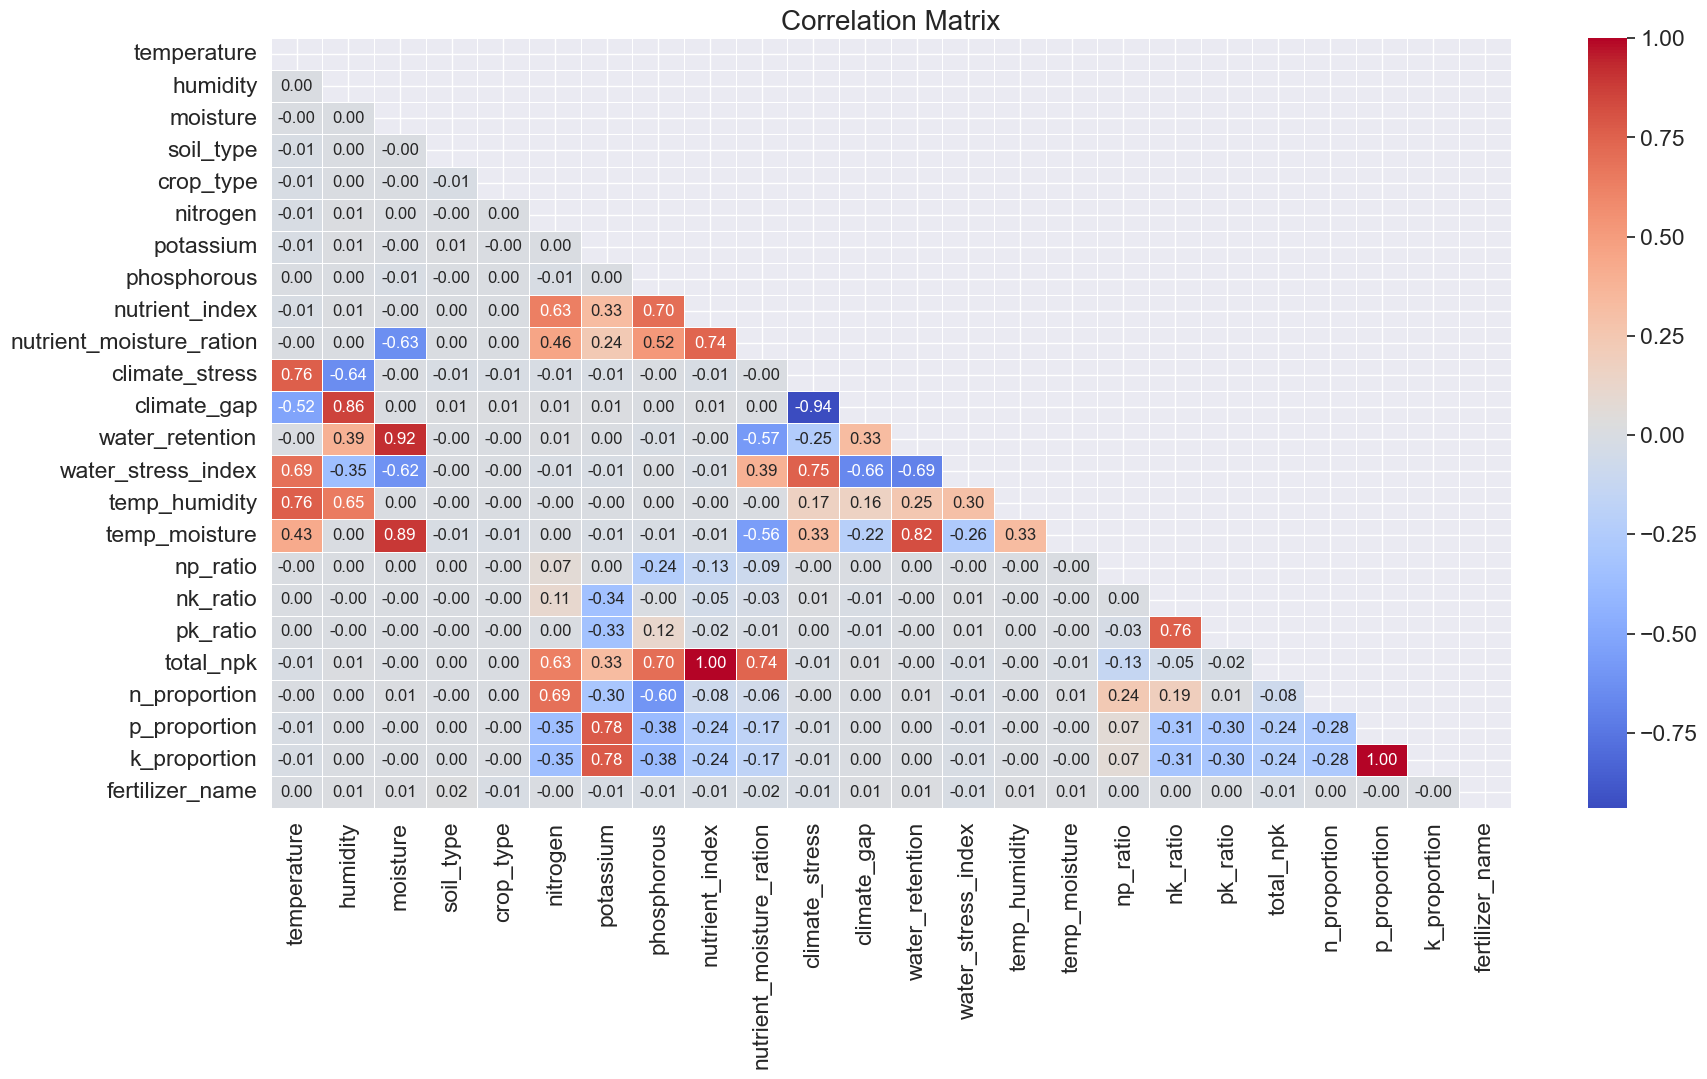

In [32]:
num_corr = round(train_df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) # add title
plt.show()

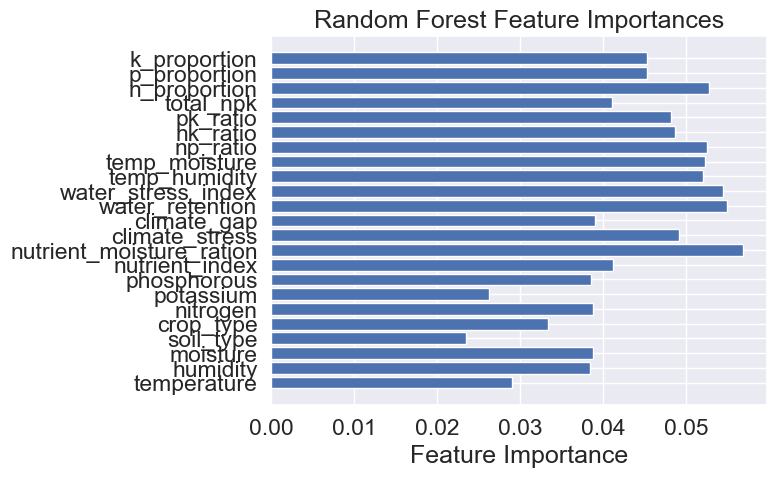

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='fertilizer_name')
y = train_df['fertilizer_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

importance = clf.feature_importances_

# Plot importances
import matplotlib.pyplot as plt
feat_names = X_train.columns
plt.barh(feat_names, importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [34]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats= 10, random_state= 42)
sorted_importance = pd.Series(result.importances_mean, index= X_test.columns).sort_values(ascending= False)

In [35]:
sorted_importance

crop_type                   0.003555
soil_type                   0.002065
moisture                    0.001913
nitrogen                    0.001888
nutrient_moisture_ration    0.001833
np_ratio                    0.001736
pk_ratio                    0.001300
phosphorous                 0.001226
total_npk                   0.001081
potassium                   0.000949
nk_ratio                    0.000784
n_proportion                0.000768
temp_moisture               0.000584
humidity                    0.000428
p_proportion                0.000362
water_retention             0.000229
temperature                 0.000167
k_proportion                0.000074
nutrient_index              0.000018
temp_humidity              -0.000009
climate_gap                -0.000336
water_stress_index         -0.000387
climate_stress             -0.000424
dtype: float64

In [54]:
#classification issues
def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Logistic Regression" : LogisticRegression(),
        "Random Forest" : RandomForestClassifier(),
        "XGB" : XGBClassifier()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        if name in ['Logistic Regression']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            print(f"Features scaled for model {name}")

        print(f"Training model: {name}")

        model.fit(X_train_scaled, y_train)

        y_train_predict = model.predict(X_train_scaled) #to test accuracy on the train dataframe
        y_test_predict = model.predict(X_test_scaled)

        results.append({
            "Model" : name,
            "Train Accuracy" : accuracy_score(y_train, y_train_predict),
            "Test Accuracy" : accuracy_score(y_test, y_test_predict),
            "Train Precision" : precision_score(y_train, y_train_predict, average = 'weighted'),
            "Test Precision" : precision_score(y_test, y_test_predict, average = 'weighted'),
            "Train F1 Score" : f1_score(y_train, y_train_predict, average = 'weighted'),
            "Test F1 Score" : f1_score(y_test, y_test_predict, average = 'weighted')
        })

    #Convering result into a df
    results_df = pd.DataFrame(results)
    print("\n Model Performance Summary: ")
    print(results_df)
    

    return results_df


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [ ]:
baseline_results_df = train_and_eval_models(X_train, X_test, y_train, y_test)
baseline_results_df

Starting the training process.
Features scaled for model Logistic Regression
Training model: Logistic Regression
Training model: Random Forest
Training model: XGB

 Model Performance Summary: 
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.158091       0.157489         0.149746   
1        Random Forest        1.000000       0.159822         1.000000   
2                  XGB        0.275257       0.184613         0.282239   

   Test Precision  Train F1 Score  Test F1 Score  
0        0.154428        0.130592       0.130220  
1        0.158001        1.000000       0.156839  
2        0.183652        0.270145       0.179094  


ValueError: too many values to unpack (expected 2)

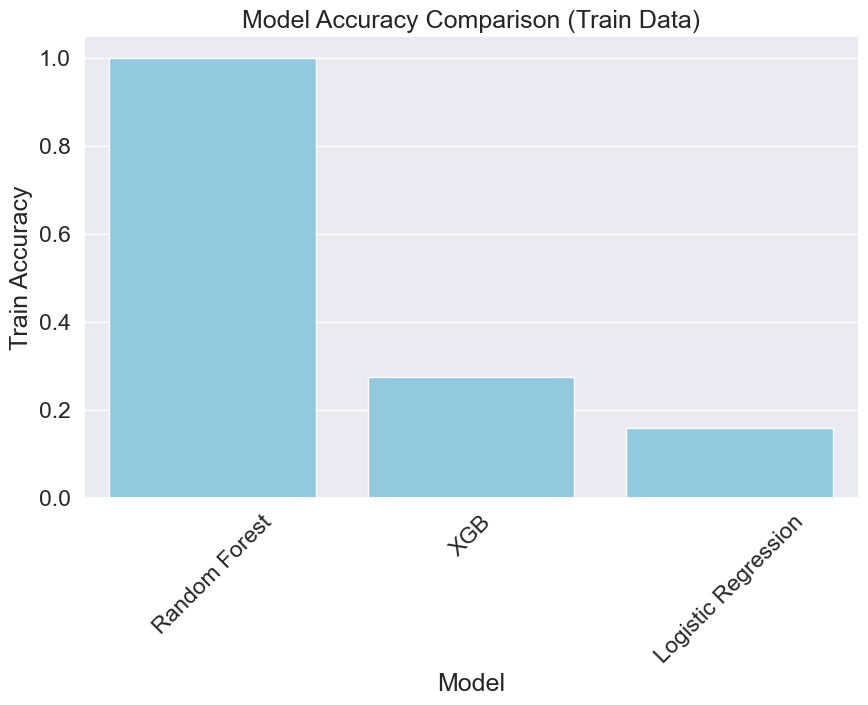

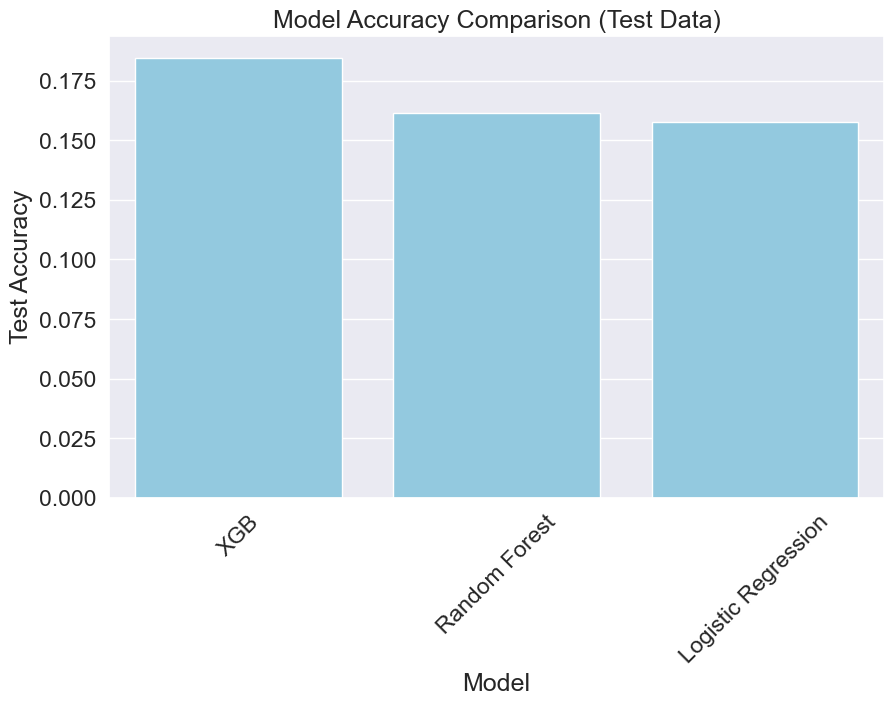

In [56]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=baseline_results_df.sort_values(by='Train Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=baseline_results_df.sort_values(by='Test Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()

## Feature engineering test_df

In [59]:
test_df['nutrient_index'] = test_df['nitrogen'] + test_df['phosphorous'] + test_df['potassium']
test_df['nutrient_moisture_ration'] = test_df['nutrient_index'] / (test_df['moisture'] + 1e-6)
test_df['climate_stress'] = (test_df['temparature'] - test_df['humidity']) / (test_df['temparature'] +1e-6)
test_df['climate_gap'] = abs(test_df['temparature'] - test_df['humidity'])
test_df['water_retention'] = test_df['moisture'] * test_df['humidity']
test_df['water_stress_index'] = test_df['temparature'] / (test_df['humidity'] + test_df['moisture'] + 1e-6)
test_df['temp_humidity'] = test_df['temparature'] * test_df['humidity']
test_df['temp_moisture'] = test_df['temparature'] * test_df['moisture']
test_df['np_ratio'] = test_df['nitrogen'] / (test_df['phosphorous'] + 1e-6)
test_df['nk_ratio'] = test_df['nitrogen'] / (test_df['potassium'] + 1e-6)
test_df['pk_ratio'] = test_df['phosphorous'] / (test_df['potassium'] + 1e-6)
test_df['total_npk'] = test_df['nitrogen'] + test_df['phosphorous'] + test_df['potassium']
test_df['n_proportion'] = test_df['nitrogen'] / (test_df['total_npk'] + 1e-6)
test_df['p_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)
test_df['k_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)

In [61]:
id_placeholder = test_df['id']

test_df = test_df.drop(columns='id')

In [62]:
test_model_results = model.predict(test_df)

NameError: name 'model' is not defined